In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor


# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 20,10          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 
import warnings
warnings.filterwarnings('ignore')

### 데이터 준비

In [2]:
df1 = pd.read_csv('dataset/boston.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 머신러닝을 위한 전처리

In [3]:
x = df1.drop('target', axis=1)
y = df1['target']

In [4]:
scaler1 = StandardScaler()
scaler1.fit(x)
x = scaler1.transform(x)
x

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

### 모델 선정

In [5]:
# KFold 생성 : 교차 검증을 위해 데이터 구성을 하는 작업 

# 결과 데이터를 보고 분류 (회귀에서는 KFold사용)
# fold1 = StratifiedKFold(n_splits=10)

fold1=KFold(n_splits=10, shuffle=True, random_state=1)


### KNN
- 회귀는 scoring = 'r2'

In [6]:
params ={
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

model1 = KNeighborsRegressor()
grid1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=fold1)
grid1.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}') # 정확도는 아님 (1에 가까울수록 좋음)

최적의 하이퍼 파라미터 : {'n_neighbors': 3}
최적의 모델 평균 성능 : 0.8376627503363364


### 선형모델
- LinearRegression : 가장 기본적인 선형 회귀, 통계에서의 선형 회귀에 해당한다.
- Ridge : LinearRegression에서 규제함수 l2를 추가 한것
- Lasso : LinearRegression에서 규제함수 l1를 추가 한것
- ElasticNet : Ridge와 Lasso의 절충안.

In [7]:
# Ridge

params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model2 = Ridge()
grid2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=fold1)
grid2.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균 성능 : 0.851004741748298


In [8]:
# Lasso

params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model3 = Lasso()
grid3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=fold1)
grid3.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 0.0001}
최적의 모델 평균 성능 : 0.8509776005061424


In [9]:
# ElasticNet

params = {
    # 값이 낮으면 규제가 약해지고 값이 크면 규제가 강해진다
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]
}

model4 = ElasticNet()
grid4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=fold1)
grid4.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')


최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균 성능 : 0.8509925475043933


In [10]:
# SVR

params = {
    # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
    'C' :[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}

model5 = SVR()
grid5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=fold1)
grid5.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid5.best_score_}')


최적의 하이퍼 파라미터 : {'C': 100}
최적의 모델 평균 성능 : 0.9086789533233992


### 결정트리

In [11]:
# 결정트리
params={
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model6 = DecisionTreeRegressor()
grid6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=fold1)
grid6.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid6.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 6}
최적의 모델 평균 성능 : 0.8358690667577802


### 앙상블

In [13]:
# 랜덤 포레스트

params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model7 = RandomForestRegressor()
grid7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=fold1)
grid7.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid7.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.898891045923194


In [14]:
# 부스팅 

params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model8 = GradientBoostingRegressor()
grid8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=fold1)
grid8.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.9142969767962784


In [16]:
# 부스팅 

params={
    # 트리의 개수
    'n_estimators':[i for i in range(0,201,50)],
    # 질문 깊이
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10]
}

model9 =  XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist') # gpu 사용하여 정확도를 끌어올릴수 있음
grid9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=fold1)
grid9.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid9.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 2, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.9047450804232156


In [17]:
# 각 모델의 최적의 하이퍼 파라미터가 설정된 모델을 추출한다.
best0 = LinearRegression()
best1 = grid1.best_estimator_
best2 = grid2.best_estimator_
best3 = grid3.best_estimator_
best4 = grid4.best_estimator_
best5 = grid5.best_estimator_
best6 = grid6.best_estimator_
best7 = grid7.best_estimator_
best8 = grid8.best_estimator_
best9 = grid9.best_estimator_

In [18]:
print(best0)
print('-'*60)
print(best1)
print('-'*60)
print(best2)
print('-'*60)
print(best3)
print('-'*60)
print(best4)
print('-'*60)
print(best5)
print('-'*60)
print(best6)
print('-'*60)
print(best7)
print('-'*60)
print(best8)
print('-'*60)
print(best9)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
------------------------------------------------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
------------------------------------------------------------
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
------------------------------------------------------------
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
------------------------------------------------------------
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           ran

### 교차검증

In [19]:
r0 = cross_val_score(best0, x,y, scoring='r2', cv=fold1)
r1 = cross_val_score(best1, x,y, scoring='r2', cv=fold1)
r2 = cross_val_score(best2, x,y, scoring='r2', cv=fold1)
r3 = cross_val_score(best3, x,y, scoring='r2', cv=fold1)
r4 = cross_val_score(best4, x,y, scoring='r2', cv=fold1)
r5 = cross_val_score(best5, x,y, scoring='r2', cv=fold1)
r6 = cross_val_score(best6, x,y, scoring='r2', cv=fold1)
r7 = cross_val_score(best7, x,y, scoring='r2', cv=fold1)
r8 = cross_val_score(best8, x,y, scoring='r2', cv=fold1)
r9 = cross_val_score(best9, x,y, scoring='r2', cv=fold1)

### 평균 성능 출력

In [20]:
print(r0.mean())
print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())
print(r8.mean())
print(r9.mean())

0.8509777564842589
0.8376627503363364
0.851004741748298
0.8509776005061424
0.8509925475043933
0.9086789533233992
0.8404771221561518
0.8972085592370572
0.9136652714381374
0.9047450804232156


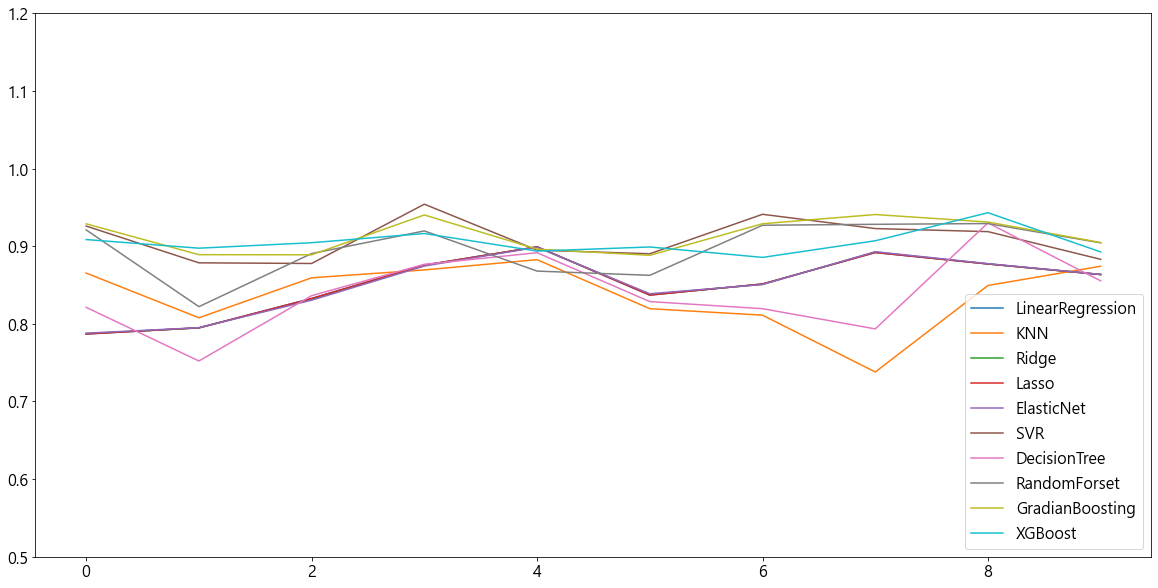

In [21]:
# 그래프를 보고 편차가 심하지 않은것을 찾음 
# x축은 교차 검증 번호

plt.plot(r0, label='LinearRegression')
plt.plot(r1, label='KNN')
plt.plot(r2, label='Ridge')
plt.plot(r3, label='Lasso')
plt.plot(r4, label='ElasticNet')
plt.plot(r5, label='SVR')
plt.plot(r6, label='DecisionTree')
plt.plot(r7, label='RandomForset')
plt.plot(r8, label='GradianBoosting')
plt.plot(r9, label='XGBoost')

plt.legend()
plt.ylim(0.5,1.2)
plt.show()

### 모든 모델에 데이터를 학습시킨다.

In [22]:
best0.fit(x, y)
best1.fit(x, y)
best2.fit(x, y)
best3.fit(x, y)
best4.fit(x, y)
best5.fit(x, y)
best6.fit(x, y)
best7.fit(x, y)
best8.fit(x, y)
best9.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

### 예측 결과를 추출한다.

In [23]:
pred0 = best0.predict(x)
pred1 = best1.predict(x)
pred2 = best2.predict(x)
pred3 = best3.predict(x)
pred4 = best4.predict(x)
pred5 = best5.predict(x)
pred6 = best6.predict(x)
pred7 = best7.predict(x)
pred8 = best8.predict(x)
pred9 = best9.predict(x)

### 그래프를 통해 예측값과 실제값 비교

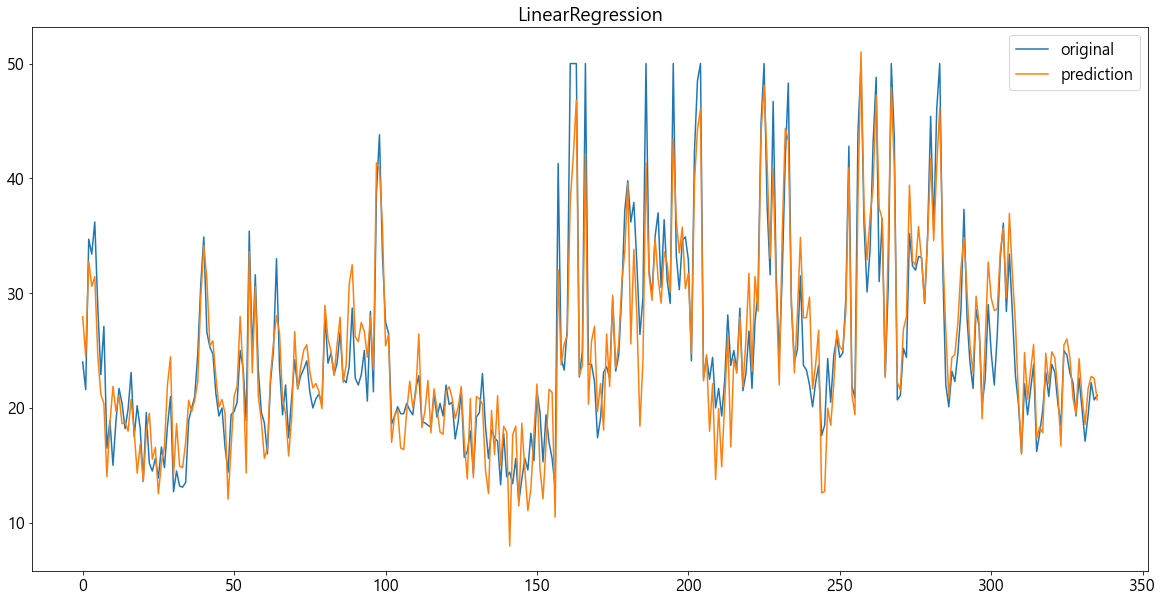

In [29]:
# LinearRegression 
plt.plot(y, label='original')
plt.plot(pred0, label='prediction')
plt.title('LinearRegression')
plt.legend()
plt.show()

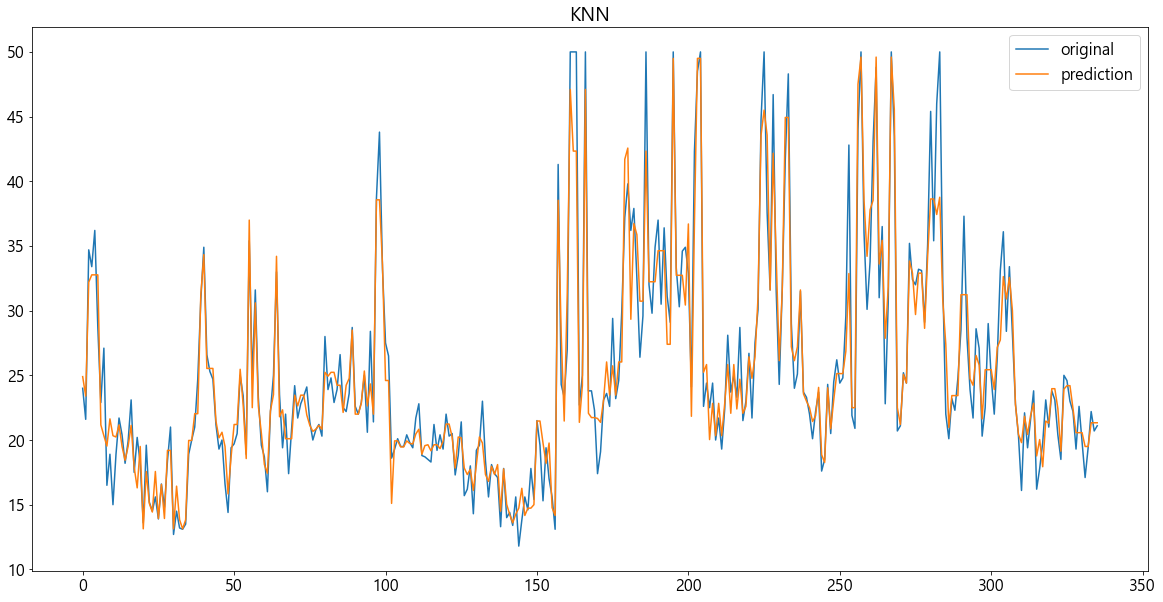

In [25]:
# KNN
plt.plot(y, label='original')
plt.plot(pred1, label='prediction')
plt.title('KNN')
plt.legend()
plt.show()

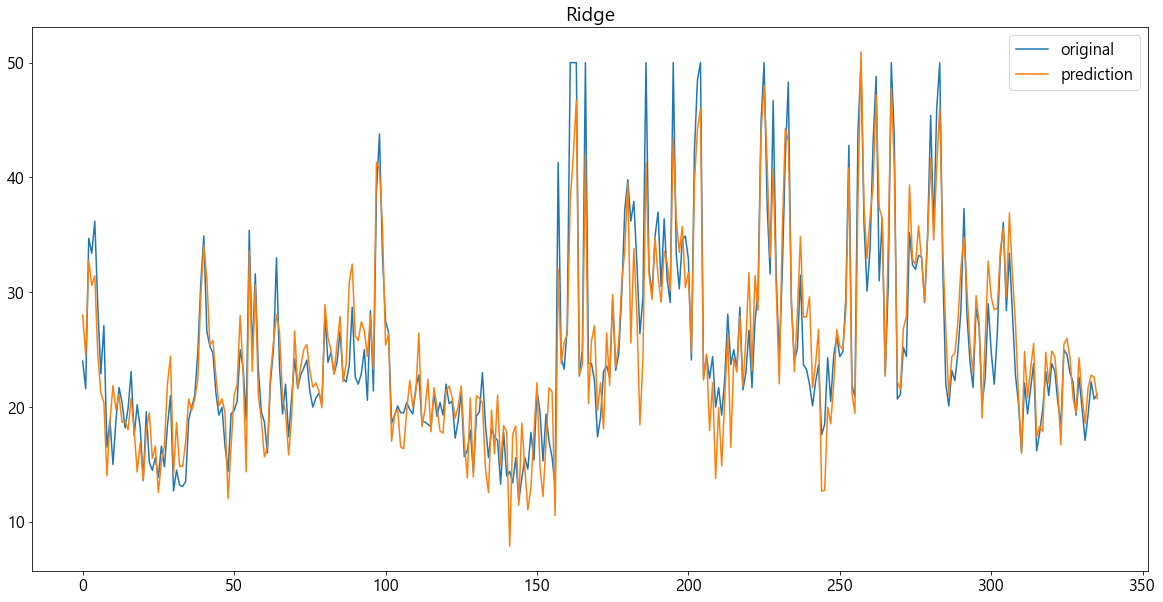

In [30]:
# Ridge
plt.plot(y, label='original')
plt.plot(pred2, label='prediction')
plt.title('Ridge')
plt.legend()
plt.show()

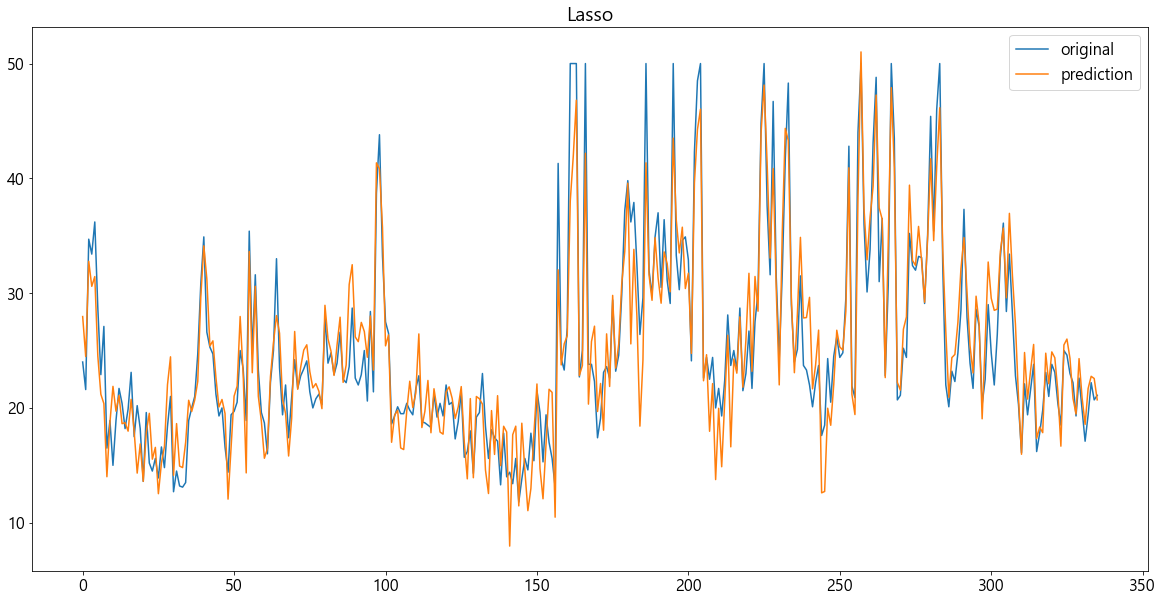

In [31]:
# Lasso
plt.plot(y, label='original')
plt.plot(pred3, label='prediction')
plt.title('Lasso')
plt.legend()
plt.show()

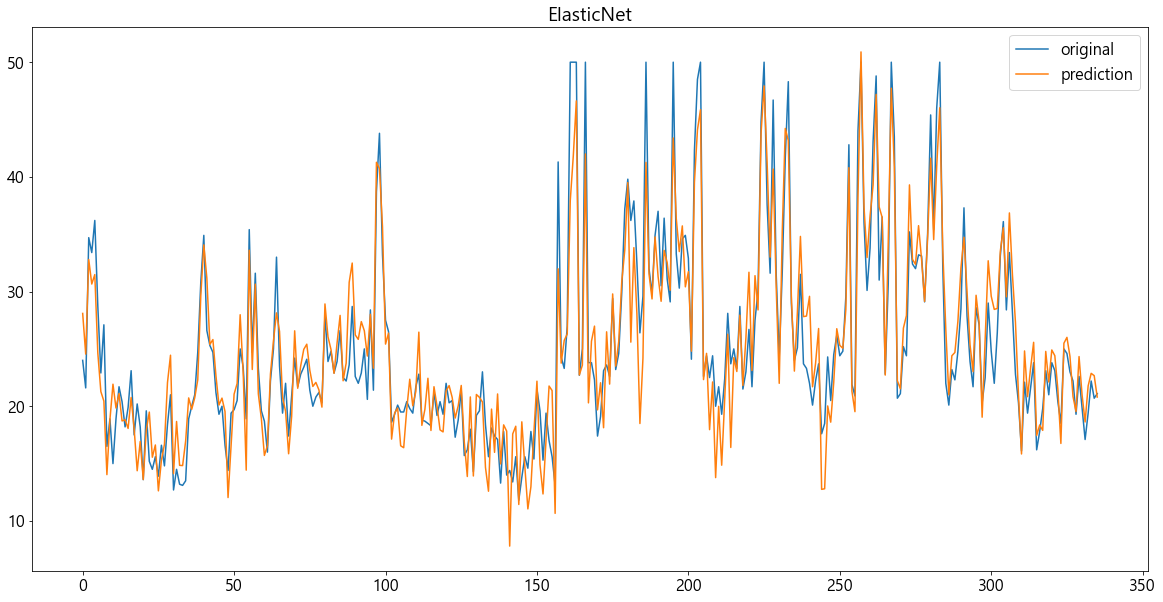

In [32]:
# ElasticNet
plt.plot(y, label='original')
plt.plot(pred4, label='prediction')
plt.title('ElasticNet')
plt.legend()
plt.show()

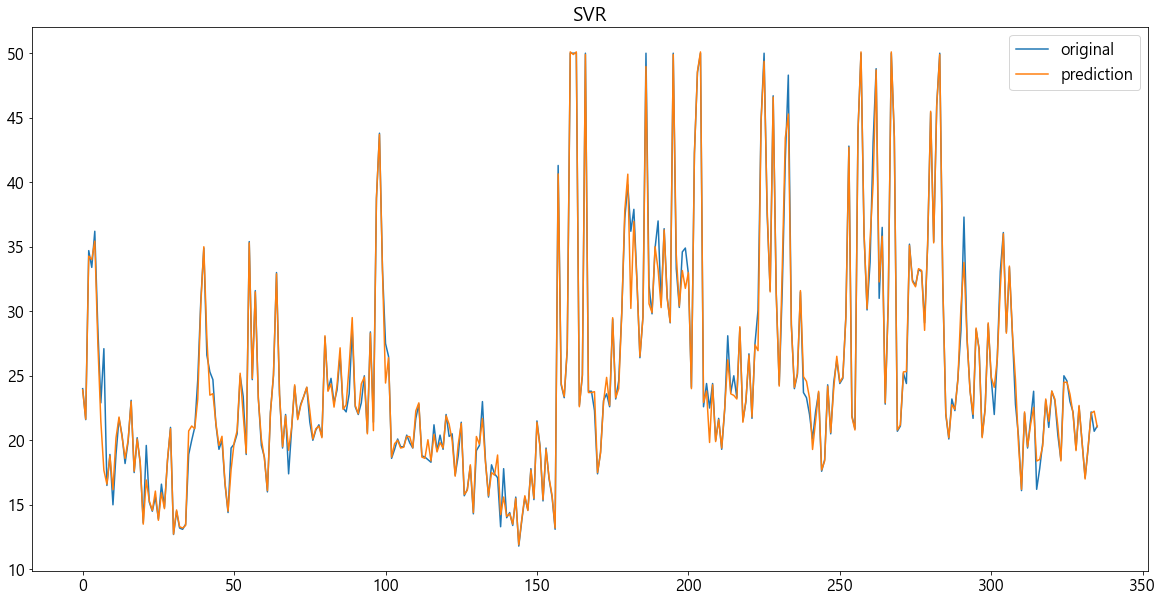

In [33]:
# SVR
plt.plot(y, label='original')
plt.plot(pred5, label='prediction')
plt.title('SVR')
plt.legend()
plt.show()

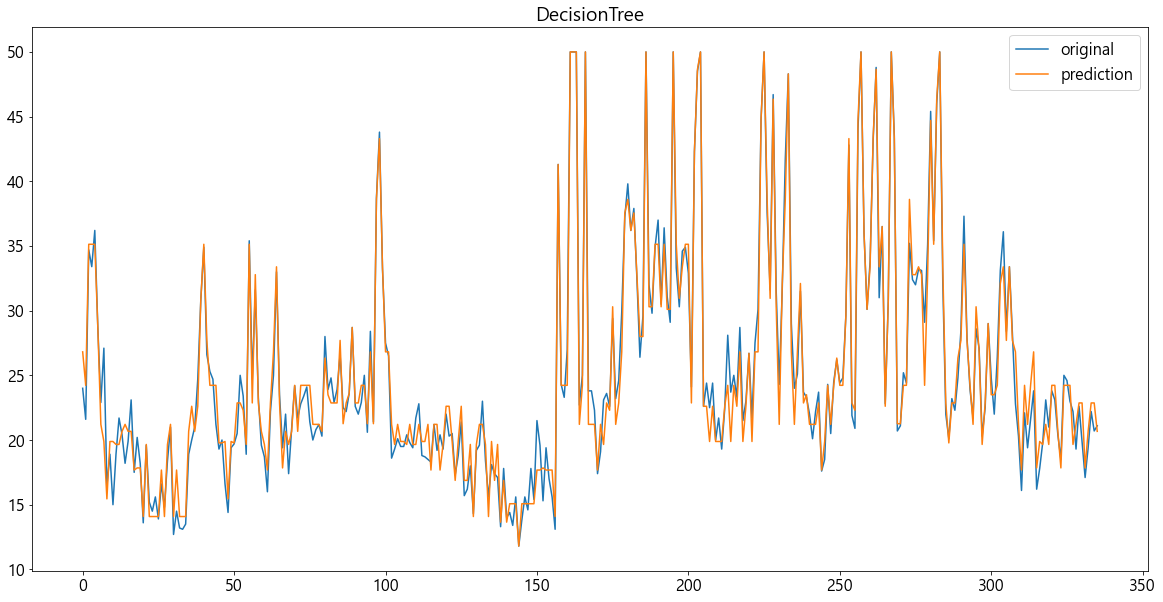

In [35]:
# DecisionTree
plt.plot(y, label='original')
plt.plot(pred6, label='prediction')
plt.title('DecisionTree')
plt.legend()
plt.show()

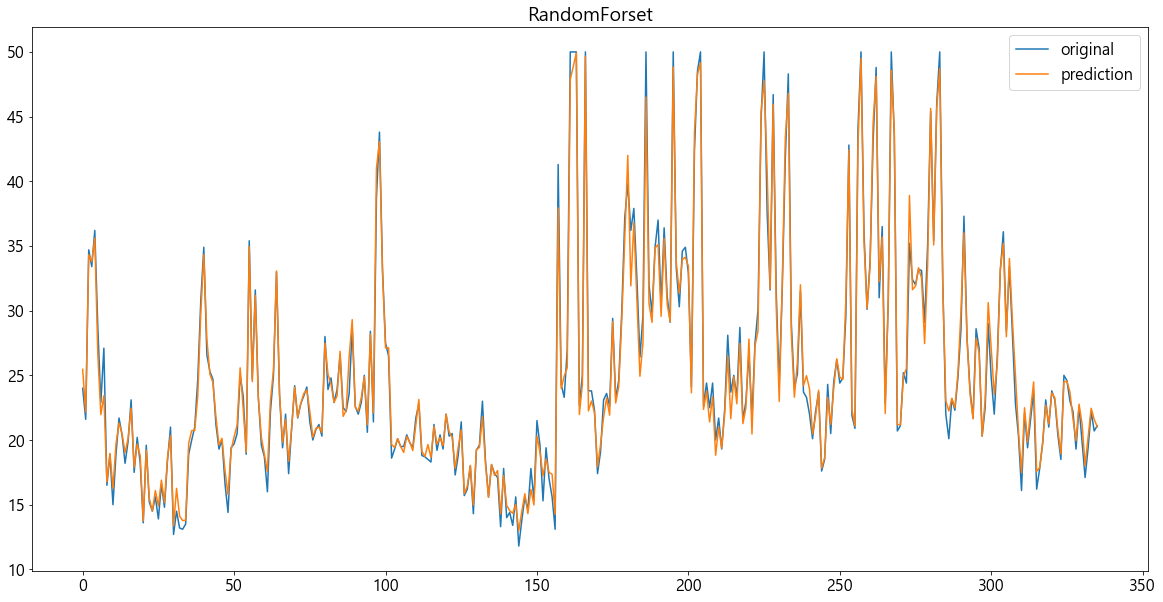

In [36]:
# RandomForset
plt.plot(y, label='original')
plt.plot(pred7, label='prediction')
plt.title('RandomForset')
plt.legend()
plt.show()

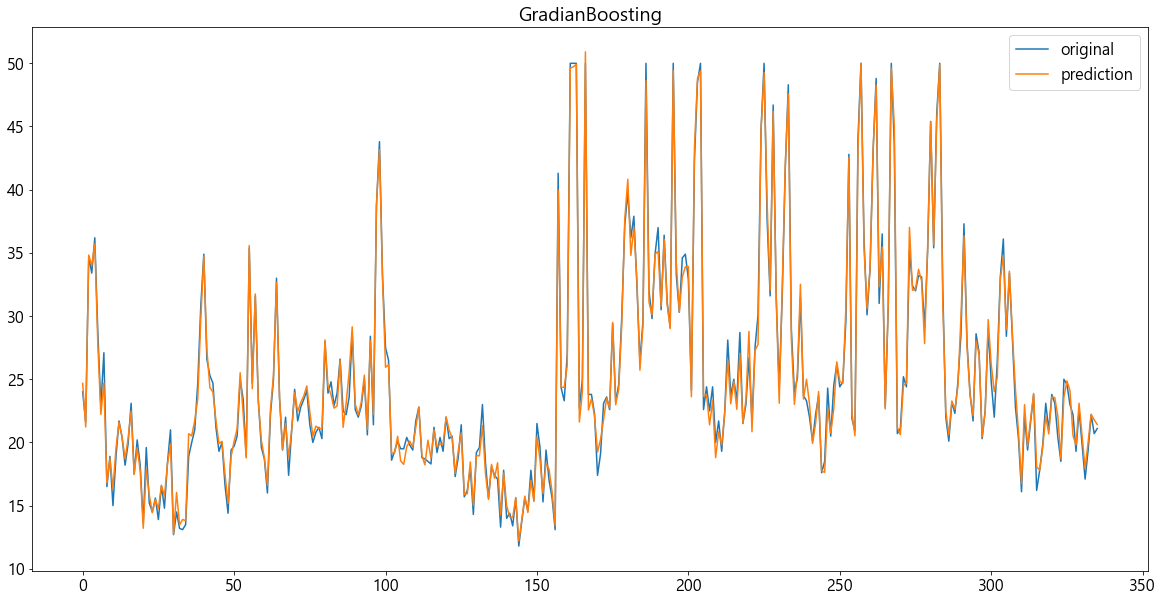

In [40]:
# GradianBoosting
plt.plot(y, label='original')
plt.plot(pred8, label='prediction')
plt.title('GradianBoosting')
plt.legend()
plt.show()

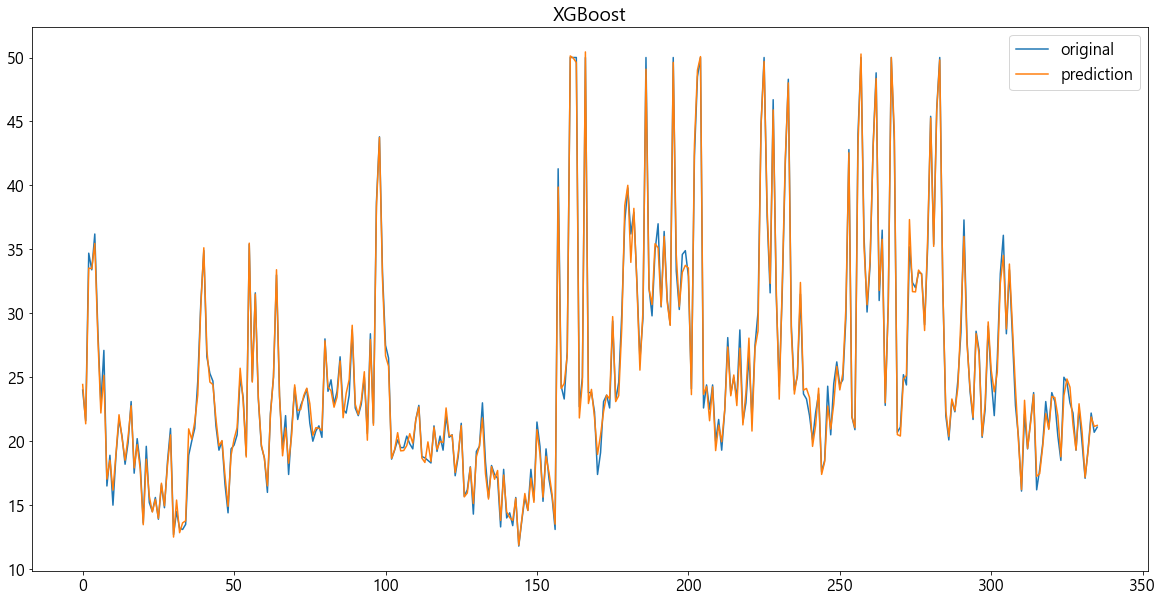

In [39]:
# XGBoost
plt.plot(y, label='original')
plt.plot(pred9, label='prediction')
plt.title('XGBoost')
plt.legend()
plt.show()

### 예측 결과를 가져온다.

In [41]:
df2 = pd.read_csv('dataset/boston_new.csv')
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29


In [42]:
# 전처리
x2 = scaler1.transform(df2)
x2

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [43]:
# 가장 높은 성능을 낸 best6으로 값을 예측

pred100 = best6.predict(x2)
pred100

array([20.66923077, 22.60833333, 22.86538462, 20.66923077, 20.66923077,
       33.38888889, 22.86538462, 26.81428571, 30.3       , 21.209375  ,
       17.67857143, 22.86538462, 26.33333333, 23.6       , 22.86538462,
       26.33333333, 20.66923077, 32.78333333, 20.66923077, 20.66923077,
       14.08461538, 19.65714286, 21.209375  , 19.65714286, 24.22727273,
       17.67857143, 17.84285714, 17.67857143, 50.        , 20.66923077,
       17.67857143, 17.67857143, 20.66923077, 26.81428571, 41.3       ,
       24.22727273, 20.66923077, 11.8       , 11.8       , 36.        ,
       15.075     , 15.075     , 15.075     , 15.075     , 23.6       ,
       15.075     , 15.075     , 15.075     , 11.8       , 15.075     ,
       11.8       , 15.075     , 11.8       , 14.08461538, 14.08461538,
       14.08461538, 14.08461538, 19.65714286, 14.08461538, 14.08461538,
       14.08461538, 14.08461538, 15.075     , 15.075     , 15.075     ,
       15.075     , 14.08461538, 14.08461538, 15.075     , 15.07

In [44]:
df2['target'] = pred100

In [45]:
df2.to_csv('dataset/boston_result.csv')